<a href="https://colab.research.google.com/github/Mercymerine/Machine_Learning_1/blob/main/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Missing column names do i decided to add the column names from the source of the data
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']


In [3]:
abalone_data =pd.read_csv('/content/drive/MyDrive/abalone/abalone.data', names=column_names)
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


DATA ENCODING

In [7]:
#Binary encoding for Sex: 1 for Male(M), 0 for Female (F), -1 for infant (I)
abalone_data['Sex_binary'] = abalone_data['Sex'].apply(lambda x: 1 if x == 'M' else (-1 if x == 'I' else 0))
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_binary
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,-1


In [8]:
abalone_data.drop('Sex',inplace=True, axis=1)

In [9]:
abalone_data.head()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_binary
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,-1


In [24]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex_binary      4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


DATA ANALYSIS

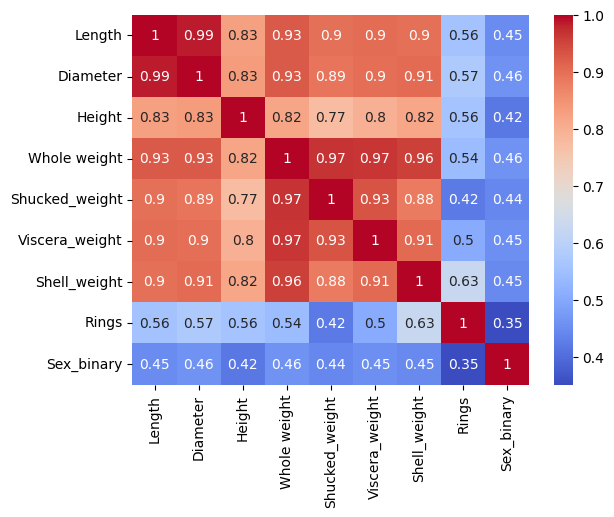

In [11]:
sns.heatmap(abalone_data.corr(), cmap='coolwarm', annot=True)
plt.show()

MODELLING

In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
abalone_data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_binary'],
      dtype='object')

In [14]:
X = abalone_data.drop('Rings', axis=1)
y = abalone_data['Rings']

In [15]:
#Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = regr.predict(X_test)
y_pred

array([11.87832964, 10.31216715, 13.8665945 , 11.83138703, 11.21298207,
       10.35199668,  9.52894756,  9.16178272,  7.2483362 , 10.6244662 ,
       12.05551795,  7.42348229, 12.10563453,  7.53803069,  8.26769902,
       13.15175184, 12.56254456, 11.53525463, 14.23560895,  8.85774785,
       18.3822421 ,  5.69480332, 11.4404373 , 11.48414403,  9.74623548,
        7.67921498,  9.82532468,  8.65293036, 10.01416655,  9.242593  ,
       10.48941216, 11.37844903,  7.25766376, 10.35985894,  8.90181023,
        9.25387813,  6.44706226,  4.31688673,  8.11881202,  7.13064761,
       12.02016161, 16.63129548, 12.82165241,  9.10210307, 11.61934694,
       11.1742938 ,  9.55133219,  9.35536664, 12.69090798,  5.45084363,
        6.88427411, 20.45065515,  9.73590934,  4.9699281 ,  6.73197643,
       10.37757115, 11.30535225, 14.50237484,  9.93150415,  7.99322855,
       11.83554177, 13.24143209, 10.57747477,  7.73757999,  7.60282989,
       10.94877796,  5.38152101,  6.97539583,  9.06359083, 12.12

In [18]:
#The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ -0.60240931  11.98865331  10.79776134   8.99939057 -20.5240731
  -9.18651466   8.76229995   0.37023044]


In [19]:
#The mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 4.9503105029361905


In [20]:
#The intercept
print('Intercept', regr.intercept_)

Intercept 3.3218717383626695


Polynomial Regression


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression

In [27]:
model1 = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print('Mean Squared error:', mean_squared_error(y_test, y_pred))

Mean Squared error: 4.85851710371901


In [23]:
model2 = make_pipeline(FunctionTransformer(func = np.exp), LinearRegression())
model2 = model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print('Mean squares error:',  mean_squared_error(y_test, y_pred))

Mean squares error: 5.405232390088719
